# Assignment 2 - Machine Learning Basics

## Iuliia Oblasova
Netid:  io26

Github link: *https://github.com/IuliiaO/machine-learning-course*

## Learning Objectives:
1. Be able to apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
2. Understand the bias-variance tradeoff and how adjusting model flexibility impacts model selection and the training process

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.<br>
__The flexible method will perform better because it will be hard to overfit the data when the number of degrees of freedom is very high.__<br>
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.<br>
__In this case flexible method will lead to overfitting, so inflexible method is a better choice.__<br>
3. The relationship between the predictors and response is highly non-linear.<br>
__Choosing an inflexible method will cause an underfitting, so we should use a flexible method.__<br>
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high.<br>
__The flexible method, in this case, will be sensitive to noise and perform worse then inflexible method due to a high risk of overfitting.__<br>

**ANSWER**

## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.<br>

**(a)** We collect a set of data on the top 500 firms in the US. For each firm, we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.<br>
__This is a regression problem because the output variable is continuous. This is also an inference problem because we are primarily interested in the understanding the relations between variables. the sample size n is 500 and the number of predictors n is 3.__<br>

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product, we have recorded whether it was a success or failure, the price charged for the product, marketing budget, competition price, and ten other variables.
__This is a classification problem because the goal is to classify the outcome in one of two classes (success or failure). We are interested to make a prediction about the outcome of a new product. Sample size n = 20 (number of similar products) and number of predictors p = 13 (excluding an outcome variable, which is not counted as a predictor).__<br>

**(c)** We are interested in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.<br>
__This is a regression problem because we are interested to predict a continuous variable (the % change). This is an inference problem because the main goal is to predict the change in one value in relation with other predictors. Sample size n = 52 (number of week in a year), number of predictors p = 3 (changes on US, British and German markets).__<br>

**ANSWER**

# Practical Questions

## 3
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

**ANSWER**:

In [1258]:
#Reference: https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/
import numpy as np
# (a) Write your own kNN classifier
class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self, k):
        #Sets the number of k nearest neighbors.
        self.k = k
        pass
    
    def fit(self, x, y):
        # Save the training data to properties of this class
        self.x = np.array(x)
        self.y = np.array(y)
        pass
    def count(self,array):
        #Count number of occurrences of each value in array casted to an int type
        n = np.bincount(array.astype(int))
        #Returns the indices of the maximum values along an axis.
        return np.argmax(n)

    def predict(self, x):
        y_hat = [] 
        # Variable to store the estimated class label for          
        # Calculate the distance from each vector in x to the training data
        for i in range(x.shape[0]):
            array = np.tile(x[i],(self.x.shape[0],1))
            #Calculates the distance
            distance = np.sum((array-self.x)**2,axis=1)**(0.5)
            #Returns the indices that would sort an array of distance values.
            index = np.argsort(distance)
            #Returns the index of element which is in the list.
            index = np.isin(index,[range(1,self.k+1)])
            index = np.where(index)
            nearest_neighbor = self.y[index]
            y_hat.append(self.count(nearest_neighbor))
        # Return the estimated targets
        return y_hat

# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

_b)._

In [1259]:
from numpy import genfromtxt
#genfromtxt - loads data from the text file.
x_train_low = genfromtxt('./data/A2_X_train_low.csv',delimiter=',')
y_train_low = genfromtxt('./data/A2_y_train_low.csv',delimiter=',')

x_test_low = genfromtxt('./data/A2_X_test_low.csv',delimiter=',')
y_test_low = genfromtxt('./data/A2_y_test_low.csv',delimiter=',')

x_train_high = genfromtxt('./data/A2_X_train_high.csv',delimiter=',')
y_train_high = genfromtxt('./data/A2_y_train_high.csv',delimiter=',')

x_test_high = genfromtxt('./data/A2_X_test_high.csv',delimiter=',')
y_test_high = genfromtxt('./data/A2_y_test_high.csv',delimiter=',')


_c)._

In [1260]:
#Let's calculate the speed and the accuracy of our algorithm.
import time

knn = Knn(5)
start = time.time()
knn.fit(x_train_low,y_train_low)
pred_low = knn.predict(x_test_low)
end = time.time()

print("Created knn-algorithm performed the task on the low dimensional data set in", round(end-start,3),"sec, with an accuracy",accuracy(y_test_low,pred_low))

knn = Knn(5)
start = time.time()
knn.fit(x_train_high,y_train_high)
pred_high = knn.predict(x_test_high)
end = time.time()

print("Created knn-algorithm performed the task on the high dimensional data set in", round(end-start,3),"sec, with an accuracy",accuracy(y_test_high,pred_high))

Created knn-algorithm performed the task on the low dimensional data set in 0.181 sec, with an accuracy 0.855
Created knn-algorithm performed the task on the high dimensional data set in 0.383 sec, with an accuracy 0.596


_d)._

In [1261]:
#Now compare the values we recieved in part c). with the speed and accuracy of the scikit algorithm.
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
start = time.time()
knn.fit(x_train_low,y_train_low)
pred_low = knn.predict(x_test_low)
end = time.time()

print ("The time of the scikit algorithm for the low dimensional data is", round(end-start,3), "sec and it's accuracy",accuracy(y_test_low, pred_low))
knn = KNeighborsClassifier(n_neighbors=5)
start = time.time()
knn.fit(x_train_high,y_train_high)
pred_high = knn.predict(x_test_high)
end = time.time()
print ("The time of the scikit algorithm for the high dimensional data is", round(end-start,3), "sec and it's accuracy",accuracy(y_test_high, pred_high))

The time of the scikit algorithm for the low dimensional data is 0.005 sec and it's accuracy 0.925
The time of the scikit algorithm for the high dimensional data is 0.225 sec and it's accuracy 0.993


Scikit KNeighborsClassifier performed faster on both high dimensional and low dimensional data sets and had a higher accuracy.<br>

_e)._<br><br>
For some industries (e.g. stock market) the speed of the decision-making process is crucial. If the algorithm performs slow, it will not be suitable for use in a real-time analysis.

## 4
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

In [1262]:
import numpy as np

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])


In [1263]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
#a). Compute the Euclidean distance
distance=[]
for row in range(6):
    current_dist=(X[row][0]**2+X[row][1]**2+X[row][2]**2)**0.5
    distance.append(current_dist)
y=list(y)
#Create the list of tuples and sort it by the distance from the shortest to the longest.
dist_list=sorted(list(zip(distance,y)))


| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   | $distance$|
|------|-------|-------|-------|-------|-----------|
| **1**| 0     | 3     | 0     | Red   |    3.0    |
| **2**| 2     | 0     | 0     | Red   |    2.0    |
| **3**| 0     | 1     | 3     | Red   |   3.162   |
| **4**| 0     | 1     | 2     | Blue  |   2.236   | 
| **5**| -1    | 0     | 1     | Blue  |   1.414   |
| **6**| 1     | 1     | 1     | Red   |   1.732   |

In [1264]:
print(dist_list[0])

(1.4142135623730951, 'b')


b). The prediction will be 'b' because the smallest values of the computed distance = 1.414 correspond to observation 5, which is marked as 'blue'.

In [1265]:
print(dist_list[0:3])

[(1.4142135623730951, 'b'), (1.7320508075688772, 'r'), (2.0, 'r')]


c). For K=3 the closest observations are 5,6 and 2. Two of this observations are labeled as 'red' and only one as 'blue', therefore the prediction for K=3 will be 'r' because the number of 'red' closest neighbors is higher.<br>
d). High K value would suggest further model generalization, which would not be possible if the boundary is highly non-linear.

**ANSWER**:

## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

**ANSWER**

_a)._

In [1266]:
import sklearn
from sklearn.datasets import make_moons
X, y = sklearn.datasets.make_moons(1000, noise=0.35)

_b)._

Text(0,0.5,'y')

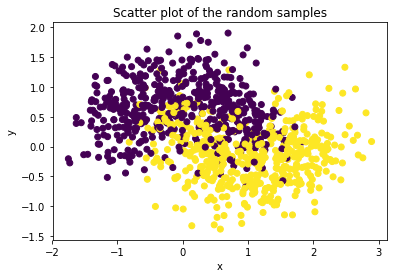

In [1267]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.title('Scatter plot of the random samples')
plt.xlabel('x')
plt.ylabel('y')

_c - d)._

In [1268]:
#Returns random integers from low (inclusive) to high (exclusive).
index = np.random.randint(0,999,100)
x1 = X[index]
y1 = y[index]
index = np.random.randint(0,999,100)
x2 = X[index]
y2 = y[index]
index = np.random.randint(0,999,100)
x3 = X[index]
y3 = y[index]

In [1269]:
#Reference: http://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_iris_knn.html
#Reference: https://stackoverflow.com/questions/45075638/graph-k-nn-decision-boundaries-in-matplotlib
from matplotlib.colors import ListedColormap
def decisionBoundary(X,y,knn,k,n):
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
    #mesh size
    h = 0.02
    #Plotting a decision boundry and assigning color to each point
    xx,yy = np.meshgrid(np.arange(-2,3),np.arange(-2,2))
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel("x")
    plt.ylabel("y")
    pass

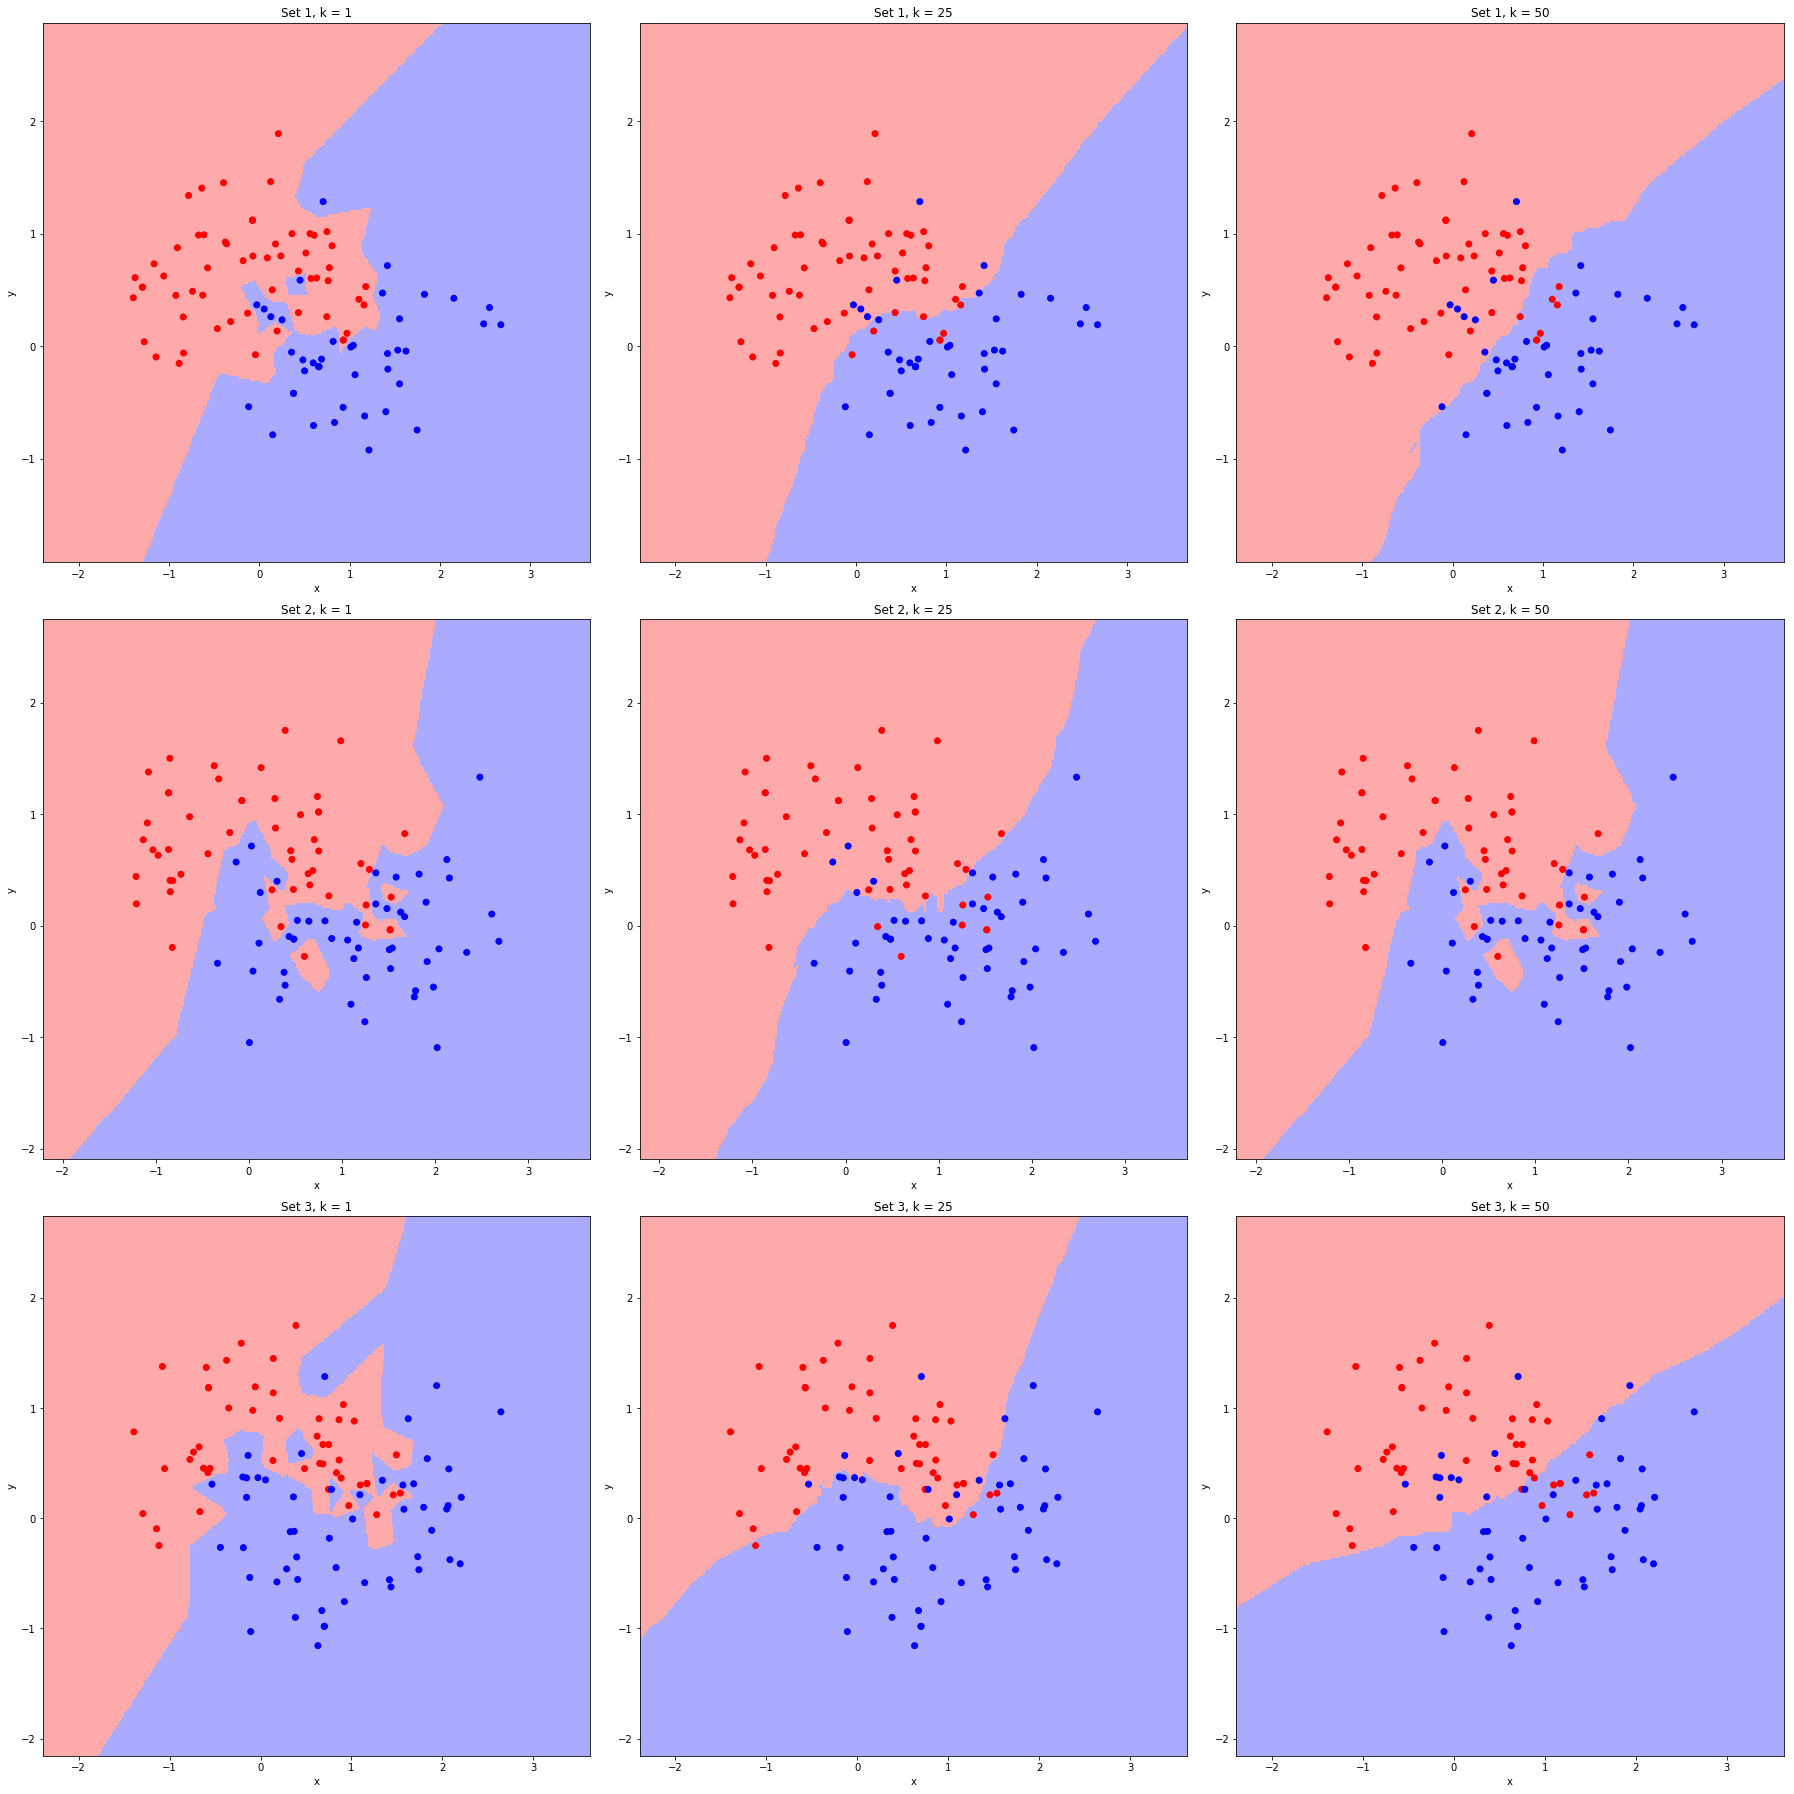

In [1270]:
#Set 1, k=1
plt.figure(figsize=(25,25))
knn_1_1 = KNeighborsClassifier(n_neighbors=1)
knn_1_1.fit(x1,y1)
plt.subplot(331) #the location of graph on the grid
plt.title ("Set 1, k = 1")
decisionBoundary(x1,y1,knn_1_1, 1,1)

#Set 1, k=25
knn_1_25 = KNeighborsClassifier(n_neighbors=25)
knn_1_25.fit(x1,y1)
plt.subplot(332)
plt.title ("Set 1, k = 25")
decisionBoundary(x1,y1,knn_1_25, 1,25)

#Set 1, k=50
knn_1_50 = KNeighborsClassifier(n_neighbors=50)
knn_1_50.fit(x1,y1)
plt.subplot(333)
plt.title ("Set 1, k = 50")
decisionBoundary(x1,y1,knn_1_50, 1,50)

#Set 2, k=1
knn_2_1 = KNeighborsClassifier(n_neighbors=1)
knn_2_1.fit(x2,y2)
plt.subplot(334)
plt.title ("Set 2, k = 1")
decisionBoundary(x2,y2,knn_2_1, 1,2)

#Set 2, k=25
knn_2_25 = KNeighborsClassifier(n_neighbors=25)
knn_2_25.fit(x2,y2)
plt.subplot(335)
plt.title ("Set 2, k = 25")
decisionBoundary(x2,y2,knn_2_25, 25,2)

#Set 2, k=50
knn_2_50 = KNeighborsClassifier(n_neighbors=50)
knn_2_50.fit(x2,y2)
plt.subplot(336)
plt.title ("Set 2, k = 50")
decisionBoundary(x2,y2,knn_2_1, 50,2)


#Set 3, k=1
knn_3_1 = KNeighborsClassifier(n_neighbors=1)
knn_3_1.fit(x3,y3)
plt.subplot(337)
plt.title ("Set 3, k = 1")
decisionBoundary(x3,y3,knn_3_1, 1,3)

#Set 3, k=25
knn_3_25 = KNeighborsClassifier(n_neighbors=25)
knn_3_25.fit(x3,y3)
plt.subplot(338)
plt.title ("Set 3, k = 25")
decisionBoundary(x3,y3,knn_3_25, 25,3)

#Set 3, k=50
knn_3_50 = KNeighborsClassifier(n_neighbors=50)
knn_3_50.fit(x3,y3)
plt.subplot(339)
plt.title ("Set 3, k = 50")
decisionBoundary(x3,y3,knn_3_50, 50,3)
#Moving the edge of an axes to make room for tick labels
plt.tight_layout(pad=1,w_pad=1,h_pad=1)
plt.show()

_e)._<br>
k = 25 separates the data in the best way whereas for k=1 changes the decision boundary the most. <br>
_f)._<br>
High bias can cause an algorithm to miss the relevant relations between features and target outputs while the high variance can cause an algorithm to model the random noise in the training data. In our example, for k=1 the decision boundary changes greatly and overfitting the data because following the trend of noise (i.e. it has high variance), and for k=50 the decision boundary misses data patterns and underfitting data due to high bias. Therefore, k=25 represents an optimal value for k and is a good visualization of bias-variance tradeoff.

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

In [1271]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons

_a)._

In [1272]:
X_train, y_train = X, y # alias previously created dataset as training set
X_test,y_test = make_moons(n_samples=1000,noise=0.35)

k = range(1,501)
#Train data
train_errors=[]
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_hat_train = knn.predict(X_train)
    train_errors.append(mean_squared_error(y_train,y_hat_train))
#Test data
test_errors = []
for i in k:
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X_train,y_train)
    y_hat_test = knn2.predict(X_test)
    test_errors.append(mean_squared_error(y_test,y_hat_test))
test=list(zip(test_errors, k))
test=sorted(test)
print("The lowest test error and the corresponding value of k:", test[0])

The lowest test error and the corresponding value of k: (0.109, 53)


_b)._

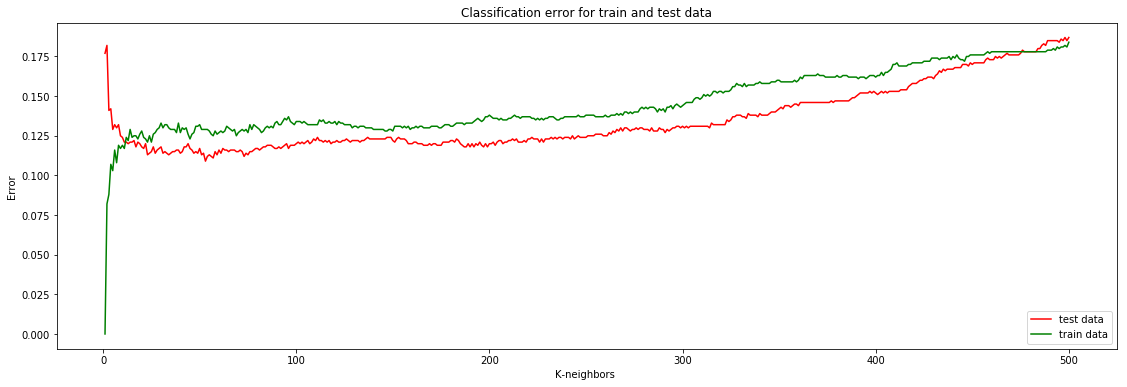

In [1273]:
plt.figure(figsize=(19,6))
plt.title("Classification error for train and test data")
plt.xlabel("K-neighbors ")
plt.ylabel("Error")
plt.plot(k,test_errors, color='red',label='test data') 
plt.plot(k,train_errors, color='green',label='train data') 
plt.show
plt.legend()

_c)._<br>
For the small values of k, the error of train data increases fastly and then grows steadily. In contrast, for the small k test data has a sharp decrease and then grows steadily as well. At k  ≈≈  300 the errors of both data sets follow a similar trend.<br>
<br>
_d)._<br>
If the training error is small and the test error is large, it suggests that the model was overfitted (high variance). Therefore, on the graph small values of k represent high variance. If the model was underfitted, then the training error is high (high bias), which in our case corresponds to the high values of k.<br>
<br>
_e)._<br>
The optimal value of k is the value which corresponds to the lowest value of test error. In our case, the lowest error of the test data is
<br>

In [1274]:
print ("k =", test[0][1],"which corresponds to the lowest test error MSE = ", test[0][0],'.')

k = 53 which corresponds to the lowest test error MSE =  0.109 .


<br>
_f)._<br>
In other models the flexibility is of the model is determined by the number of the degrees of freedom (in other words, the number of parameters and the sample size of the data set.<br>


## 7
**[20 points] Linear regression and nonlinear transformations**. You're given a dataset below that is partitioned into a training and testing dataset. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** A linear model does not mean that non-linear relationships cannot be explored. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

In [953]:
x_train = [3.19,9.26,9.38,8.77,7.91,3.79,3.18,7.61,2.36,6.26,6.62,1.53,6.25,7.93,7.07,4.58,4.14,2.14,9.04,4.56,3.99,6.71,2.51,0.84,6.13,5.22,0.25,3.60,1.36,5.59,4.81,1.14,0.36,2.31,1.37,5.86,4.23,9.48,2.26,0.77,4.33]
y_train = [46.40,172.16,209.00,203.31,82.88,62.57,14.38,177.00,8.01,82.35,84.84,-5.59,54.96,167.17,83.09,-21.63,94.64,63.97,106.57,38.99,88.26,66.99,-11.12,-0.44,65.08,61.47,-0.61,23.85,10.55,83.69,54.35,51.82,-18.63,1.98,4.90,55.44,50.09,155.66,45.57,18.12,30.58]

x_test = [5.65,0.07,8.84,5.14,6.65,1.35,5.45,7.39,3.35]
y_test = [98.52,16.09,198.45,75.90,85.11,47.64,14.76,141.03,-39.13]

x_train_sq = np.array(x_train)**2
x_test_sq = np.array(x_test)**2

**ANSWER**<br>
_a)._<br>

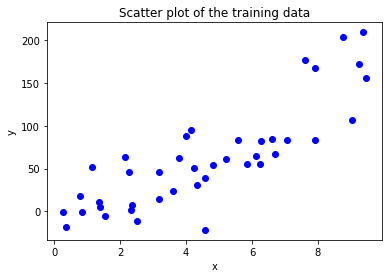

In [954]:
#a). Create a scatter plot of a training data.
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train, color="blue")
plt.title('Scatter plot of the training data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

_b)._<br>

In [955]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
#Converts a list to an array
x_train=np.asarray(x_train)
y_train=np.asarray(y_train)
regr = sklearn.linear_model.LinearRegression()
#Fitting the linear model
regr.fit(x_train.reshape(-1, 1), y_train)
#R-squared
R2=regr.score(x_train.reshape(-1, 1), y_train)
R2=round(R2,3)
print("The coefficient of determination is {}".format(R2))
y_pred=regr.predict(np.array(x_train.reshape(-1,1)))
#Mean square error
mse=mean_squared_error(y_train, y_pred)
print("The mean squared error is {0:10.3f}".format(mse))
coef=regr.coef_
intercept=regr.intercept_

The coefficient of determination is 0.701
The mean squared error is   1052.585


Therefore, the equation representing the estimated model is $y = 18.303x - 21.731$ with an $R^2 = 0.701$ and MSE = 1052.585.

_c)._<br>From the scatter plot above we could observe the light quadratic trend, so let's test whether the quadratic transformation improves our results.

In [957]:
regr2 = sklearn.linear_model.LinearRegression()
regr2.fit(x_train_sq.reshape(-1, 1), y_train)
R2_sq=regr2.score(x_train_sq.reshape(-1, 1), y_train)
R2_sq=round(R2_sq,3)
print("The coefficient of determination is {}".format(R2_sq))
y_pred_sq=regr2.predict(np.array(x_train_sq.reshape(-1,1)))
mse_sq=mean_squared_error(y_train, y_pred_sq)
print("The mean squared error is {0:10.3f}".format(mse_sq))
coef2=regr2.coef_
intercept2=regr2.intercept_
print ("The equation representing the model after the quadratic transformation was applied is:")

The coefficient of determination is 0.749
The mean squared error is    884.907
The equation representing the model after the quadratic transformation was applied is:


y = 1.87 $x^2$ + 8.885.

The mean squared error decreased and the $R^2$ slightly increased by 4.8%, so the quadratic transformation of the predictor variable is useful.

_d)._

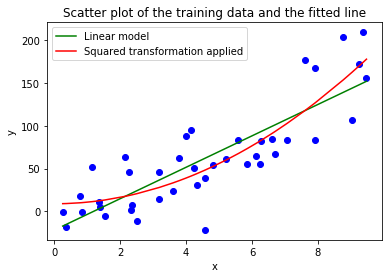

In [958]:
plt.scatter(x_train, y_train, color="blue")
plt.title('Scatter plot of the training data and the fitted line')
plt.xlabel('x')
plt.ylabel('y')
prediction=regr.predict(np.sort(x_train.reshape(-1,1), axis=0))
plt.plot(np.sort(x_train, axis=0),prediction,color='green', label="Linear model")
prediction2=regr2.predict(np.sort(x_train_sq.reshape(-1,1), axis=0))
plt.plot(np.sort(x_train, axis=0),prediction2,color='red', label="Squared transformation applied")
plt.legend()
plt.show()

_e)._<br> Apply each model to the test data.


In [965]:
#Applying first model (without transformation) 
x_test=np.asarray(x_test)
y_test=np.asarray(y_test)
regr_test = sklearn.linear_model.LinearRegression()
regr_test.fit(x_test.reshape(-1, 1), y_test)
R_test=regr.score(x_test.reshape(-1, 1), y_test)
R_test=round(R_test,3)
y_pred_test=regr.predict(np.array(x_test.reshape(-1,1)))
mse_test=mean_squared_error(y_test, y_pred_test)
#Applying first model (quadratic transformation) 
x_test_sq=np.asarray(x_test)**2
regr_test_sq = sklearn.linear_model.LinearRegression()
regr_test_sq.fit(x_test_sq.reshape(-1, 1), y_test)
R_test=regr.score(x_test_sq.reshape(-1, 1), y_test)
R_test=round(R_test,3)
y_pred_test=regr.predict(np.array(x_test_sq.reshape(-1,1)))
mse_test=mean_squared_error(y_test, y_pred_test)

$R^2$ for the test data is 0.556 and the MSE for the test data is 2023.312 for the model without transformations.
After applying the quadratic transformation on x, $R^2$ = 0.695 and MSE = 1389.815.


_f)._ Which models perform better on the training data, and which on the test data? Why?_<br>
The model with quadratic transformation performs better both on the training data and the test data, which means that the training data followed the same quadratic trend as the test data.

_g). Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?_<br>
It is hard to predict since the test data could follow the trend even better than the training data, however, this is an unlikely case. Most probably the predictive capability of the model would decrease because the training data have not represented the test data correctly.